### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
data.isnull().sum()

# Check candidates for filling data with null values
car_notna = data[data.car.notna()].car.unique()
rest_unique = data.Restaurant20To50.unique()
rest_lt_20_notna = data[data.RestaurantLessThan20.notna()].RestaurantLessThan20.unique()

car_notna


array(['Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
       'Car that is too old to install Onstar :D'], dtype=object)

In [14]:

# Check all unique values for columns

data.has_children.unique()
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
# Replace all null columns of CoffeeHouse, Bar, CarryAway,RestaurantLessThan20, Restaurant20To50 with "never"
fill_cols = [
    'CoffeeHouse',
    'Bar',
    'CarryAway',
    'RestaurantLessThan20',
    'Restaurant20To50'
]
data.loc[:, fill_cols] = data[fill_cols].fillna("never")

# Replace all null columns of car with 'do not drive'
data.loc[:, ['car']] = data['car'].fillna("do not drive")

# Check the data.
print(data.car.unique())
print(data.info())


['do not drive' 'Scooter and motorcycle' 'crossover' 'Mazda5'
 'Car that is too old to install Onstar :D']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 n

4. What proportion of the total observations chose to accept the coupon?



In [16]:
# Percentage of records that chose to accept the coupon
accept_percentage = data[data.Y == 1].Y.count() / data.Y.count()
print(accept_percentage)
data.Y.mean()

0.5684326710816777


np.float64(0.5684326710816777)

5. Use a bar plot to visualize the `coupon` column.

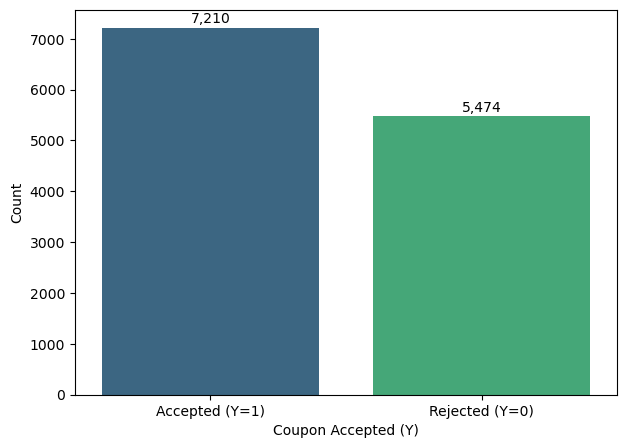

In [25]:

y_counts = data['Y'].value_counts().reset_index()
y_counts.columns = ['Coupon Accepted (Y)', 'Count']
y_counts['Coupon Accepted (Y)'] = y_counts['Coupon Accepted (Y)'].map({
    1: 'Accepted (Y=1)', 
    0: 'Rejected (Y=0)'
})

# Generate the bar chart
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Coupon Accepted (Y)', 
    y='Count', 
    data=y_counts, 
    palette='viridis',
    hue='Coupon Accepted (Y)'
)

# Write the count values on top of the bars
for index, row in y_counts.iterrows():
    plt.text(
        index, 
        row['Count'] + 100, # Position text slightly above the bar
        f"{row['Count']:,}", 
        color='black', 
        ha="center"
    )

# Save fig and show. 
plt.savefig('images/accepted_counts.png')
plt.show()


In [31]:
def coupon_accepted_barplot(df, x_axis_title='Coupon Accepted (Y)', y_axis_title='Count', x_sub_label='All', is_save_fig=False):
    x_axis_str = x_axis_title+" - "+x_sub_label
    y_axis_str = y_axis_title
    y_counts = df['Y'].value_counts().reset_index()
    y_counts.columns = [x_axis_str, y_axis_str]
    y_counts[x_axis_str] = y_counts[x_axis_str].map({
        1: 'Accepted (Y=1)', 
        0: 'Rejected (Y=0)'
    })
    
    # Generate the bar chart
    plt.figure(figsize=(7, 5))
    sns.barplot(
        x=x_axis_str, 
        y=y_axis_str, 
        data=y_counts, 
        palette='viridis',
        hue=x_axis_str
    )

    # --- FIX COUNT DISPLAY LEVEL ---
    # Find the maximum count value and Set the Y-axis limit to add a 10% margin above the highest bar
    max_y = y_counts[y_axis_str].max()
    plt.ylim(0, max_y * 1.1)
    
    # Write the count values on top of the bars
    for index, row in y_counts.iterrows():
        plt.text(
            index, 
            row['Count'] + 100, # Position text slightly above the bar
            f"{row['Count']:,}", 
            color='black', 
            ha="center"
        )
    
    # Save fig and show. 
    if is_save_fig:
        plt.savefig('images/accepted_counts.png')
    plt.show()

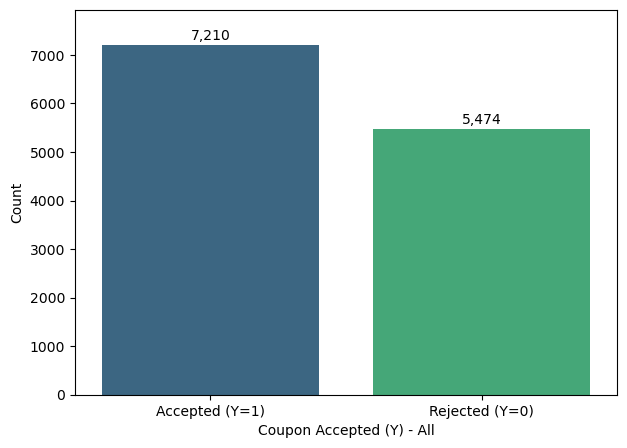

In [32]:
coupon_accepted_barplot(data, 'Coupon Accepted (Y)', 'Count', 'All', False) 

6. Use a histogram to visualize the temperature column.

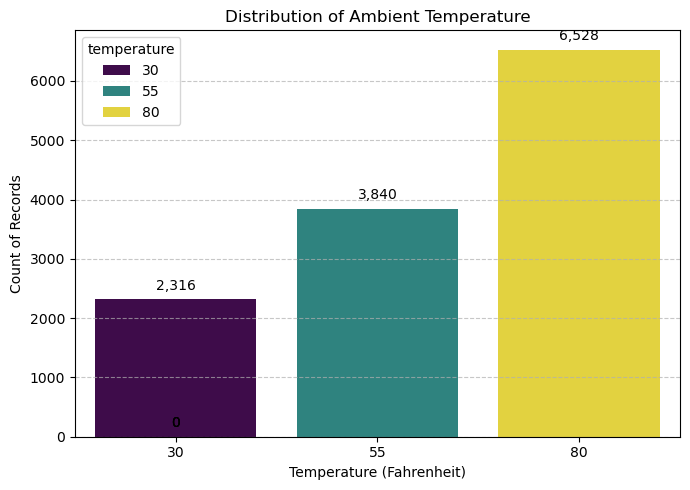

In [18]:
plt.figure(figsize=(7, 5))

ax = sns.countplot(
    x='temperature', 
    data=data, 
    # Ensure bars are ordered numerically (30, 55, 80)
    order=sorted(data['temperature'].unique()), 
    palette='viridis',
    hue='temperature'
)

# Add titles and labels
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count of Records')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Write the count values on top of the bars
for p in ax.patches:
    ax.annotate(
        # Format the count with commas
        f'{int(p.get_height()):,}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

# Save fig and show. 
plt.savefig('images/temparature_hist.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_coupons_data = data[data['coupon'] == 'Bar'].copy()
bar_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,do not drive,never,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,do not drive,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,do not drive,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


0.41001487357461575


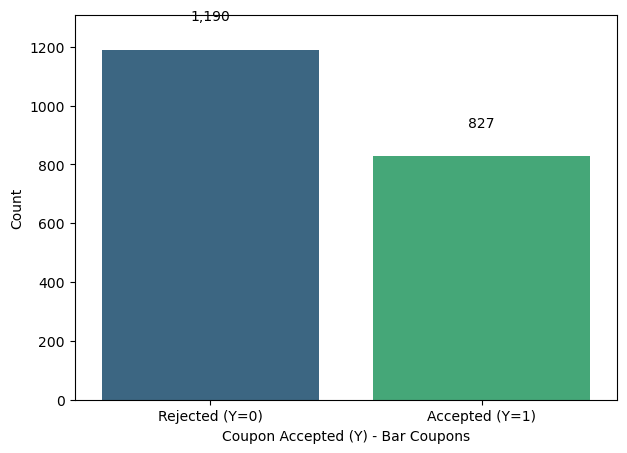

In [33]:
# Percentage of records that chose to accept the coupon
bar_accept_percentage = bar_coupons_data[bar_coupons_data.Y == 1].Y.count() / bar_coupons_data.Y.count()
print(bar_accept_percentage)
bar_coupons_data['Y'].mean()
coupon_accepted_barplot(bar_coupons_data, 'Coupon Accepted (Y)', 'Count', 'Bar Coupons', False)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [34]:
# Bar: ['never' 'less1' '1~3' 'gt8' '4~8']
target_values_lte_3 = ['never', 'less1', '1~3']
target_values_gt_3 = ['4~8', 'gt8']
acceptance_rate_lte_3 = bar_coupons_data[bar_coupons_data.Bar.isin(target_values_lte_3)].Y.mean()
acceptance_rate_gt_3 = bar_coupons_data[bar_coupons_data.Bar.isin(target_values_gt_3)].Y.mean()

print(f"Coupon acceptance rate between those who went to a bar 3 or fewer times a month : {acceptance_rate_lte_3}")
print(f"Coupon acceptance rate between those who went to a bar more than 3 times a month: {acceptance_rate_gt_3}")


Coupon acceptance rate between those who went to a bar 3 or fewer times a month : 0.37073707370737075
Coupon acceptance rate between those who went to a bar more than 3 times a month: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
# age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
a = bar_coupons_data.age.unique()
target_values_age_below_25 = ['below21', '21']
target_values_age_over_25 = list(set(a) - set(target_values_age_below_25))
target_values_bar_gt_1m = ['1~3', '4~8', 'gt8']

acceptance_rate_1 = bar_coupons_data[(bar_coupons_data.age.isin(target_values_age_over_25)) & (bar_coupons_data.Bar.isin(target_values_bar_gt_1m))].Y.mean()
acceptance_rate_2 = bar_coupons_data[~((bar_coupons_data.age.isin(target_values_age_over_25)) & (bar_coupons_data.Bar.isin(target_values_bar_gt_1m)))].Y.mean()

print(f"Coupon acceptance rate for those who go to a bar more than once a month and are over the age of 25 : {acceptance_rate_1}")
print(f"Coupon acceptance rate for all others but previous : {acceptance_rate_2}")

acceptance_rate_lte_3_A = bar_coupons_data[(bar_coupons_data.Bar.isin(target_values_lte_3)) & (bar_coupons_data.age.isin(target_values_age_below_25))].Y.mean()
acceptance_rate_lte_3_B = bar_coupons_data[(bar_coupons_data.Bar.isin(target_values_lte_3)) & (bar_coupons_data.age.isin(target_values_age_over_25))].Y.mean()
print(f"Coupon acceptance rate between those who went to a bar 3 or fewer times a month AND below 21 : {acceptance_rate_lte_3_A}")
print(f"Coupon acceptance rate between those who went to a bar 3 or fewer times a month AND over 21 : {acceptance_rate_lte_3_B}")

Coupon acceptance rate for those who go to a bar more than once a month and are over the age of 25 : 0.6952380952380952
Coupon acceptance rate for all others but previous : 0.33500313087038197
Coupon acceptance rate between those who went to a bar 3 or fewer times a month AND below 21 : 0.4512471655328798
Coupon acceptance rate between those who went to a bar 3 or fewer times a month AND over 21 : 0.3449527959331881


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [36]:
target_values_bar_gt_1m = ['1~3', '4~8', 'gt8']
all_passengers = bar_coupons_data.passanger.unique()
target_passengers = list(set(all_passengers) - set(['Kid(s)']))
all_occupations = bar_coupons_data.occupation.unique()
target_occupations = list(set(all_occupations) - set(['Farming Fishing & Forestry']))

filter_group = (
    bar_coupons_data.Bar.isin(target_values_bar_gt_1m) &
    bar_coupons_data.passanger.isin(target_passengers) &
    bar_coupons_data.occupation.isin(target_occupations)
)

acceptance_rate_bar_only = bar_coupons_data[bar_coupons_data.Bar.isin(target_values_bar_gt_1m)].Y.mean()
acceptance_rate_bar_nokids = bar_coupons_data[(bar_coupons_data.Bar.isin(target_values_bar_gt_1m)) & (bar_coupons_data.passanger.isin(target_passengers))].Y.mean()
acceptance_rate = bar_coupons_data[filter_group].Y.mean()

print(f"Acceptance rate for drivers who go to bars more than once a month: {acceptance_rate_bar_only}")
print(f"Acceptance rate for same drivers when there is are no kids passengers: {acceptance_rate_bar_nokids}")

print(f"Acceptance rate for same drivers when there is are no kids passengers AND were not occupied in fff: {acceptance_rate}")


Acceptance rate for drivers who go to bars more than once a month: 0.6879194630872483
Acceptance rate for same drivers when there is are no kids passengers: 0.7132486388384754
Acceptance rate for same drivers when there is are no kids passengers AND were not occupied in fff: 0.7132486388384754


In [37]:
# Check the impact of fisheries occupation
filter_group = (
    bar_coupons_data.occupation.isin(['Farming Fishing & Forestry'])
)
bar_coupons_data[filter_group].Bar.unique()

# Interestingly, those who work in Farming Fishing & Forestry visit a bar less than once a month. 


array(['never', 'less1'], dtype=object)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [38]:
# Bar Freq: more than once a month (1-3, 4-8, >8)
high_bar_visits = ['1~3', '4~8', 'gt8'] 

# Age: under 30
age_under_30 = ['below21', '21', '26']

# Cheap Rest Freq: more than 4 times a month (4-8, >8)
high_cheap_rest = ['4~8', 'gt8'] 

# Income: less than $50K
low_income = [
    'Less than $12500', 
    '$12500 - $24999', 
    '$25000 - $37499', 
    '$37500 - $49999'
]

# Filter Group A: High Bar Freq AND Not Kid Passenger AND Not Widowed
filter_group_A = (
    bar_coupons_data.Bar.isin(high_bar_visits) &
    ~bar_coupons_data.passanger.isin(['Kid(s)']) &
    ~bar_coupons_data.maritalStatus.isin(['Widowed'])
)

# Filter Group B: High Bar Freq AND Age < 30
filter_group_B = (
    bar_coupons_data['Bar'].isin(high_bar_visits) &
    bar_coupons_data['age'].isin(age_under_30)
)

# Filter Group C: Cheap Rest Freq > 4/mo AND Income < $50K
filter_group_C = (
    bar_coupons_data['RestaurantLessThan20'].isin(high_cheap_rest) &
    bar_coupons_data['income'].isin(low_income)
)

filter_group = filter_group_A | filter_group_B | filter_group_C

acceptance_rate = bar_coupons_data[filter_group].Y.mean()

acceptance_rate_A = bar_coupons_data[filter_group_A].Y.mean()
acceptance_rate_B = bar_coupons_data[filter_group_B].Y.mean()
acceptance_rate_C = bar_coupons_data[filter_group_C].Y.mean()

print(f"Acceptance rate {acceptance_rate}")
print()
print(f"Acceptance rate A {acceptance_rate_A}")
print(f"Acceptance rate B {acceptance_rate_B}")
print(f"Acceptance rate C {acceptance_rate_C}")

Acceptance rate 0.5889175257731959

Acceptance rate A 0.7132486388384754
Acceptance rate B 0.7217391304347827
Acceptance rate C 0.45348837209302323


In [137]:
# Filter Group C: Cheap Rest Freq > 4/mo AND Income < $50K
filter_group_C = (
    bar_coupons_data['Bar'].isin(high_bar_visits) &
    bar_coupons_data['RestaurantLessThan20'].isin(high_cheap_rest) &
    bar_coupons_data['income'].isin(low_income)
)
filter_group = filter_group_A | filter_group_B | filter_group_C
acceptance_rate = bar_coupons_data[filter_group].Y.mean()
print(f"Acceptance rate {acceptance_rate}")

Acceptance rate 0.7135231316725978


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [141]:
# The least acceptance is from those who frequent bars less than three times a month. 
# Interestingly, out of this lot, those who are younger (below 21) tend to accept the coupon more than those who are over 21.
# Those who went to a bar more than three times a month had the highest acceptance rate of 76.88%
# When we look at only those who visit a bar more than a month, the rate dropped to 69.52%. This indicates a good size of drift exists when the visits go slightly over by 2.
# The acceptance rate went up when there are no kids passengers (to 71.32%)
# Those who work in Farming Fishing & Forestry visit a bar less than once a month.
# The acceptance rate was consistently higher when they visit a bar once a month or higher. Their marital status had no impact on the decision.
# Amongst those who have high bar visits, those who were younger than 30 tend to accept the coupons more (72.1% vs 71.32%)
# It might seem like those who go to cheap restraunts and earn less than 50k had a low acceptance rate but if we look at only those who have high bar visits, there is no skew.

print("- The least acceptance is from those who frequent bars less than three times a month.")
print("- Interestingly, out of this lot, those who are younger (below 21) tend to accept the coupon more than those who are over 21.")
print("- Those who went to a bar more than three times a month had the highest acceptance rate of 76.88%")
print("- When we look at only those who visit a bar more than a month, the rate dropped to 69.52%")
print("- The acceptance rate went up when there are no kids passengers (to 71.32%)")
print("- Those who work in Farming Fishing & Forestry visit a bar less than once a month.")
print("- The acceptance rate was consistently higher when they visit a bar once a month or higher. Their marital status had no impact on the decision.")
print("- Amongst those who have high bar visits, those who were younger than 30 tend to accept the coupons more (72.1% vs 71.32%)")
print("- It might seem like those who go to cheap restraunts and earn less than 50k had a low acceptance rate but if we look at only those who have high bar visits, there is no skew.")


- The least acceptance is from those who frequent bars less than three times a month.
- Interestingly, out of this lot, those who are younger (below 21) tend to accept the coupon more than those who are over 21.
- Those who went to a bar more than three times a month had the highest acceptance rate of 76.88%
- When we look at only those who visit a bar more than a month, the rate dropped to 69.52%
- The acceptance rate went up when there are no kids passengers (to 71.32%)
- Those who work in Farming Fishing & Forestry visit a bar less than once a month.
- The acceptance rate was consistently higher when they visit a bar once a month or higher. Their marital status had no impact on the decision.
- Amongst those who have high bar visits, those who were younger than 30 tend to accept the coupons more (72.1% vs 71.32%)
- It might seem like those who go to cheap restraunts and earn less than 50k had a low acceptance rate but if we look at only those who have high bar visits, there is no ske

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [144]:
# Check if the data is of right datatype
data.has_children.unique()
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

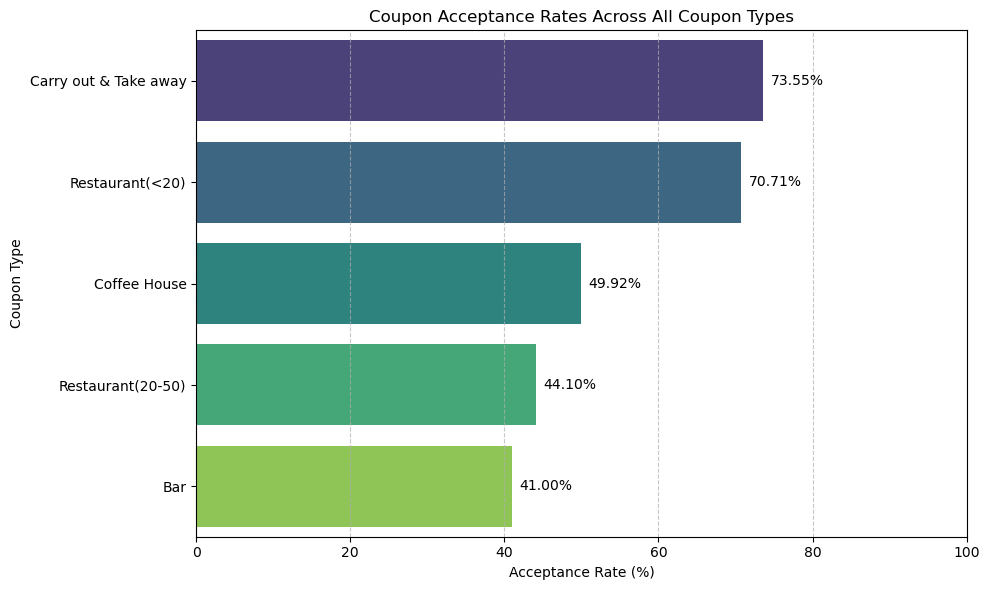

In [40]:
# 1. Calculate the acceptance rate (mean of Y) for each coupon type
acceptance_rates = data.groupby('coupon')['Y'].mean().sort_values(ascending=False).reset_index()
acceptance_rates.columns = ['Coupon Type', 'Acceptance Rate']

# Convert rate to percentage for better display
acceptance_rates['Acceptance Rate (%)'] = acceptance_rates['Acceptance Rate'] * 100

# 2. Generate the bar chart (horizontal for better label reading)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Acceptance Rate (%)', 
    y='Coupon Type', 
    data=acceptance_rates, 
    palette='viridis',
    # FIX: Assign the y-variable to 'hue' to avoid the deprecation warning
    hue='Coupon Type' 
)


# Add titles and labels
plt.title('Coupon Acceptance Rates Across All Coupon Types')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Coupon Type')

# Add the percentage values on the bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.2f}%', 
        (p.get_width() + 1, p.get_y() + p.get_height() / 2.), 
        ha='left', 
        va='center', 
        color='black'
    )

plt.xlim(0, 100) # Set x-limit to 0-100%
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save fig and show. 
plt.savefig('images/acceptance_rate_coupon_types.png', dpi=900)
plt.show()

In [145]:
takeaway_coupons_data = data[data['coupon'] == 'Carry out & Take away'].copy()

In [149]:
carryaway_counts = takeaway_coupons_data['CarryAway'].value_counts(dropna=False).reset_index()
carryaway_counts.columns = ['CarryAway Frequency', 'Count']

print("Count of Takeaway Coupons Grouped by CarryAway Visit Frequency:")
print(carryaway_counts.to_markdown(index=False, numalign="left", stralign="left"))

Count of Takeaway Coupons Grouped by CarryAway Visit Frequency:
| CarryAway Frequency   | Count   |
|:----------------------|:--------|
| 1~3                   | 864     |
| 4~8                   | 820     |
| less1                 | 353     |
| gt8                   | 302     |
| never                 | 54      |


In [154]:
test = takeaway_coupons_data[
    ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
]
test[test.toCoupon_GEQ25min == 1]

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4017,1,1,1,0,1,0
4039,1,1,1,0,1,1
4061,1,1,1,0,1,1
4083,1,1,1,0,1,1
4105,1,1,1,0,1,0
...,...,...,...,...,...,...
12383,1,1,1,0,1,1
12471,1,1,1,0,1,1
12537,1,1,1,0,1,0
12581,1,1,1,0,1,1


### Find rejection rate by weather

Check the impact of rejection rate based on the weather of the day. 

In [156]:
# --- 1. Rejection Rate by Weather ---
rejection_by_weather_df = (
    (1 - takeaway_coupons_data.groupby('weather')['Y'].mean())
    .sort_values(ascending=False)
    .reset_index()
)
rejection_by_weather_df.columns = ['Factor', 'Rejection Rate']
rejection_by_weather_df['Rejection Rate (%)'] = rejection_by_weather_df['Rejection Rate'] * 100

print("--- Rejection Rate by Weather ---")
print(rejection_by_weather_df.to_markdown(index=False, numalign="left", stralign="left"))


--- Rejection Rate by Weather ---
| Factor   | Rejection Rate   | Rejection Rate (%)   |
|:---------|:-----------------|:---------------------|
| Rainy    | 0.388715         | 38.8715              |
| Snowy    | 0.29316          | 29.316               |
| Sunny    | 0.237125         | 23.7125              |


### Find rejection rate by the direction of commute

Check if the coupon destination being in the same direction of travel has any impact on rejection rate 

In [157]:
# --- 2. Rejection Rate by Direction (Same Direction vs. Opposite Direction) ---
rejection_by_direction_df = (
    (1 - takeaway_coupons_data.groupby('direction_same')['Y'].mean())
    .reset_index()
)
rejection_by_direction_df.columns = ['Same Direction (1=Yes, 0=No)', 'Rejection Rate']
rejection_by_direction_df['Rejection Rate (%)'] = rejection_by_direction_df['Rejection Rate'] * 100

print("\n--- Rejection Rate by Direction ---")
print(rejection_by_direction_df.to_markdown(index=False, numalign="left", stralign="left"))



--- Rejection Rate by Direction ---
| Same Direction (1=Yes, 0=No)   | Rejection Rate   | Rejection Rate (%)   |
|:-------------------------------|:-----------------|:---------------------|
| 0                              | 0.24875          | 24.875               |
| 1                              | 0.296343         | 29.6343              |


### Find rejection rate by time to reach coupon destination for ALL the coupons

Check if the time to reach coupon destination has any impact on rejection rate 

In [169]:
# --- 3. Rejection Rate by Time/Distance Flags ---
time_cols = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
rejection_by_time_df = (
    (1 - data.groupby(time_cols)['Y'].mean())
    .reset_index()
    .sort_values(ascending=False, by='Y')
)
# Fix: Provide 4 column names to match the 4 columns in the DataFrame
rejection_by_time_df.columns = ['Time >= 5min', 'Time >= 15min', 'Time >= 25min', 'Rejection Rate']
rejection_by_time_df['Rejection Rate (%)'] = rejection_by_time_df['Rejection Rate'] * 100

print("\n--- Rejection Rate by Time/Distance (1=Yes, 0=No) ---")
print(rejection_by_time_df.to_markdown(index=False, numalign="left", stralign="left"))


--- Rejection Rate by Time/Distance (1=Yes, 0=No) ---
| Time >= 5min   | Time >= 15min   | Time >= 25min   | Rejection Rate   | Rejection Rate (%)   |
|:---------------|:----------------|:----------------|:-----------------|:---------------------|
| 1              | 1               | 1               | 0.571145         | 57.1145              |
| 1              | 1               | 0               | 0.439316         | 43.9316              |
| 1              | 0               | 0               | 0.385832         | 38.5832              |


In [163]:
# --- Define Time Slots ---
# Morning/Day: 7AM, 10AM, 2PM
time_morning_day = ['7AM', '10AM', '2PM']
# Evening/Night: 6PM, 10PM
time_evening_night = ['6PM', '10PM']

# Calculate Rejection Rate for Morning/Day Group
mask_morning = data['time'].isin(time_morning_day)
rejection_rate_morning = 1 - takeaway_coupons_data[mask_morning]['Y'].mean()

# Calculate Rejection Rate for Evening/Night Group
mask_evening = takeaway_coupons_data['time'].isin(time_evening_night)
rejection_rate_evening = 1 - takeaway_coupons_data[mask_evening]['Y'].mean()

# 3. Compile and print results
data = {
    'Time Slot': ['Morning/Day (7AM, 10AM, 2PM)', 'Evening/Night (6PM, 10PM)'],
    'Count': [mask_morning.sum(), mask_evening.sum()],
    'Rejection Rate': [rejection_rate_morning, rejection_rate_evening]
}
rejection_df = pd.DataFrame(data)
rejection_df['Rejection Rate (%)'] = rejection_df['Rejection Rate'] * 100

print("Coupon Rejection Rates by Time of Day:")
print(rejection_df[['Time Slot', 'Count', 'Rejection Rate (%)']].to_markdown(index=False, numalign="left", stralign="left"))

Coupon Rejection Rates by Time of Day:
| Time Slot                    | Count   | Rejection Rate (%)   |
|:-----------------------------|:--------|:---------------------|
| Morning/Day (7AM, 10AM, 2PM) | 1497    | 29.7929              |
| Evening/Night (6PM, 10PM)    | 896     | 20.8705              |
